# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

Regression searches for relationships among variables.

Simple Linear Regression searches for a linear relationship between an independent variable `x` and a dependand `y`.

## The data

In [2]:
df = pd.read_csv('salary_data.csv')
print(df.shape)
df.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Correlation Analysis

In [3]:
x = np.array(df.YearsExperience)
y = np.array(df.Salary)

Let's plot the data.

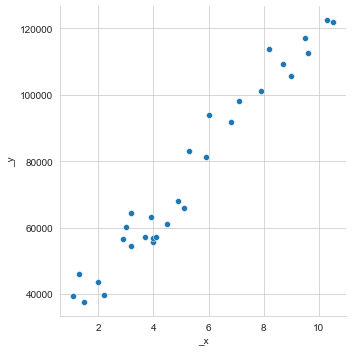

In [4]:
sns.relplot(data=df, x=x, y=y);   

It looks like there is a positive strong correlation between the variables. Let's calculate the correlation coefficient and its p-value.

In [5]:
corr, p_val = st.pearsonr(x, y)
print('Pearson Correlation Coefficient = %.4f, p-value = %.4f' %(corr, p_val))

Pearson Correlation Coefficient = 0.9782, p-value = 0.0000


There is a strong positive correlation between `YearsExperience` and `Salary`. 

p-value = 0.000 < 0.05, therefore the correlation is significant.

Let's find the equation of the trendline using simple linear regression.

## Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

It is necessary to reshape the `x` variable.

In [8]:
x = x.reshape(-1,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
# Create a model and fit it
model = LinearRegression()

In [10]:
model.fit(x, y)

LinearRegression()

You can replace the last two statements for this one:

`model = LinearRegression().fit(x, y)`

In [11]:
r_2 = model.score(x, y)
print('Coefficient of determination: %.3f' %(r_2))

Coefficient of determination: 0.957


In [12]:
print('Model: %.2f * YearsExperience + %.2f' %(model.coef_, model.intercept_))

Model: 9449.96 * YearsExperience + 25792.20


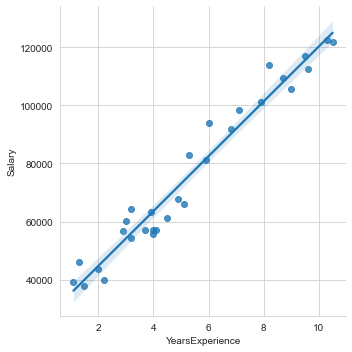

In [13]:
sns.lmplot(data=df, x='YearsExperience', y='Salary');

In [14]:
# Predict response
y_pred = model.predict(x)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


In [15]:
import statsmodels.api as sm

In [16]:
Xc = sm.add_constant(x)

In [17]:
mod = sm.OLS(y, Xc)

In [18]:
res = mod.fit()

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        22:07:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print('Coefficient of determination: %.3f' %(res.rsquared))

Coefficient of determination: 0.957


`res.params` returns a list with the model coefficients

In [21]:
res.params

array([25792.20019867,  9449.96232146])

In [22]:
print('Model: %.2f * YearsExperience + %.2f' %(res.params[1], res.params[0]))

Model: 9449.96 * YearsExperience + 25792.20


In [23]:
# Predict response
y_pred = res.predict()
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


## Model with a quadratic term